#Data Processing

In [ ]:
import numpy as np
import cv2
from pathlib import Path

In [ ]:
print(Path('.').absolute())

/content


In [ ]:
capture = cv2.VideoCapture(0)
count = 0

In [ ]:

while True:
    ret,frame = capture.read()
    Image = frame
    if ret == True:
        Image = cv2.resize(Image,(700,700))
        file_path = 'Face/DataSet/'+str(count)+'.jpeg'
        cv2.imwrite(file_path,Image)
        cv2.putText(Image, str(count), (70,70), cv2.FONT_HERSHEY_SCRIPT_COMPLEX,1,(0,255,0),2)
        cv2.imshow('DataSet Development', Image)
        count = count + 1
                
    if  cv2.waitKey(2) & 0xFF == ord('q') or count==200:
        break
    

In [ ]:
capture.release()
cv2.destroyAllWindows()

# Face Classification


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip "/content/drive/MyDrive/Face_Classifier/DataSet.zip" -d "/content/drive/MyDrive/Face_Classifier"

Archive:  /content/drive/MyDrive/Face_Classifier/DataSet.zip
   creating: /content/drive/MyDrive/Face_Classifier/DataSet/
   creating: /content/drive/MyDrive/Face_Classifier/DataSet/Manan/
  inflating: /content/drive/MyDrive/Face_Classifier/DataSet/Manan/47.jpeg  
   creating: /content/drive/MyDrive/Face_Classifier/__MACOSX/
   creating: /content/drive/MyDrive/Face_Classifier/__MACOSX/DataSet/
   creating: /content/drive/MyDrive/Face_Classifier/__MACOSX/DataSet/Manan/
  inflating: /content/drive/MyDrive/Face_Classifier/__MACOSX/DataSet/Manan/._47.jpeg  
  inflating: /content/drive/MyDrive/Face_Classifier/DataSet/Manan/148.jpeg  
  inflating: /content/drive/MyDrive/Face_Classifier/__MACOSX/DataSet/Manan/._148.jpeg  
  inflating: /content/drive/MyDrive/Face_Classifier/DataSet/Manan/10.jpeg  
  inflating: /content/drive/MyDrive/Face_Classifier/__MACOSX/DataSet/Manan/._10.jpeg  
  inflating: /content/drive/MyDrive/Face_Classifier/DataSet/Manan/109.jpeg  
  inflating: /content/drive/MyDrive

In [3]:
import numpy as np
import tensorflow as tf
from glob import glob 
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Activation, Dense, Dropout
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
folder = glob('/content/drive/MyDrive/Face_Classifier/DataSet/*')
count = len(folder)

In [5]:
train_path='/content/drive/MyDrive/Face_Classifier/DataSet'

In [6]:
train_batches = ImageDataGenerator(rescale=1.0/255,rotation_range=0.4,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest').flow_from_directory(directory=train_path,color_mode="rgb",target_size=(224,224))
valid_batches = ImageDataGenerator(rescale=1.0/255,validation_split=0.1).flow_from_directory(directory=train_path,subset="validation",color_mode="rgb",target_size=(224,224))

Found 995 images belonging to 5 classes.
Found 95 images belonging to 5 classes.


**Resnet50 Model Classification**

In [7]:
resnet50_model = ResNet50(input_shape=(224,224,3),include_top=True)

102981632/102967424 [==============================] - 1s 0us/step


In [8]:
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [9]:
# for layer in resnet50_model.layers[133:]:
#   layer.trainable = True   

last_layer = Flatten()(resnet50_model.output)
output_layer = Dense(count,activation='softmax')(last_layer)

In [15]:
# model = Model(inputs=resnet50_model.input, outputs = output_layer)
# model.summary()
model=Sequential([
      Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
      MaxPool2D(pool_size=(2,2)),
      Flatten(),
      Dense(512,activation='relu'),
      Dense(5,activation='softmax')
                     
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 788544)            0         
                                                                 
 dense_5 (Dense)             (None, 512)               403735040 
                                                                 
 dense_6 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 403,739,397
Trainable params: 403,739,397
Non-trainable params: 0
________________________________________

In [11]:
for layer in model.layers[:150]:
  layer.trainable = False

for i, layer in enumerate(model.layers):
  print(i, layer.name,"-", layer.trainable)


0 conv2d - False
1 max_pooling2d - False
2 flatten_1 - False
3 dense_1 - False
4 dense_2 - False


In [16]:
model.compile(optimizer=Adam(learning_rate= 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_batches,validation_data=valid_batches,batch_size=10,epochs=4,verbose=1)

Epoch 1/4
32/32 [==============================] - 22s 670ms/step - loss: 2.7785 - accuracy: 0.5779 - val_loss: 0.3785 - val_accuracy: 0.8000
Epoch 2/4
32/32 [==============================] - 20s 635ms/step - loss: 0.1757 - accuracy: 0.9427 - val_loss: 0.0380 - val_accuracy: 1.0000
Epoch 3/4
32/32 [==============================] - 20s 635ms/step - loss: 0.0641 - accuracy: 0.9920 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 4/4
32/32 [==============================] - 20s 635ms/step - loss: 0.0339 - accuracy: 0.9990 - val_loss: 0.0074 - val_accuracy: 1.0000


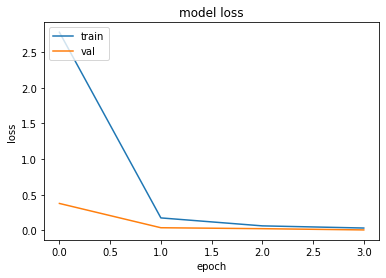

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

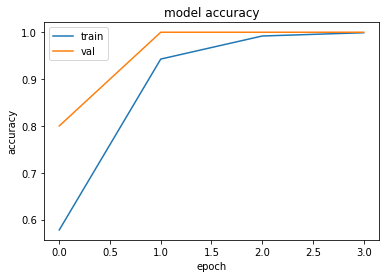

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
model.save("/content/drive/MyDrive/Face_Classifier/face_detection&classification.h5")